**The following script generates .svg and .jpg plots from a list of genes detailed in the "genes_to_plot.txt" file and stores them locally in your Downloads folder.**

1. Click on the folder icon to your left.

2. Drag and drop "ApK_LsdK_DuovsApcK_Duo_deg.csv" and "ApK_LsdK_IlevsApcK_Ile_deg.csv" below (not in) the sample data folder to load them into the Collab Notebook

3. Drag and drop the list of genes ("genes_to_plot.txt") you want to plot in the same location as in step 2. Wait for all files to be uploaded before proceeding (progress is shown in the bottom left):

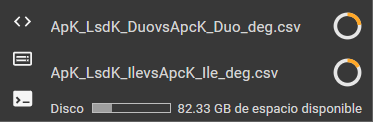

Once you complete all these steps the folder structure should look like this ✅:

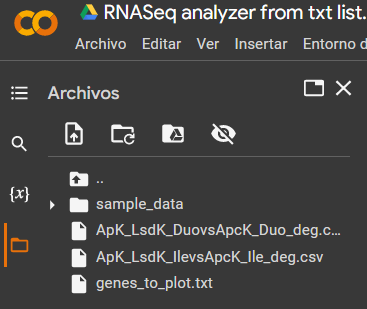

Click Play below ▶

In [ ]:
# Import necessary modules to read and plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Open and reading the contents of genes_to_plot.txt and appending them to an iterable list
with open("genes_to_plot.txt") as file:
    gene_list = [gene.strip() for gene in file.readlines()]
    gene_list_2 = [gene.capitalize() for gene in gene_list]
    print (f"The following genes will be plotted:\n{gene_list_2}")

# Reading the .csv files and assigning them to a pandas DataFrame class
df_duo = pd.read_csv("ApK_LsdK_DuovsApcK_Duo_deg.csv", sep = ";")
df_ile = pd.read_csv("ApK_LsdK_IlevsApcK_Ile_deg.csv", sep = ";")

The following genes will be plotted:
['S100a4', 'Tgfb1', 'Cav1', 'Vim', 'Lyz1', 'Muc2', 'Lgr5', 'Nt5e']


4. Click Play below ▶ to load the data from the files and plot all genes in the list. 
5. Scroll down to the end of the page and you will see the output graphs there. You will also find your graphs in .svg and .jpg format in your downloads folder (give Chrome permission to download multiple files when it asks)
---



S100a4 was not found on the .csv file, make sure you're using the right gene notation
S100a4 was not found on the .csv file and could not be plotted


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

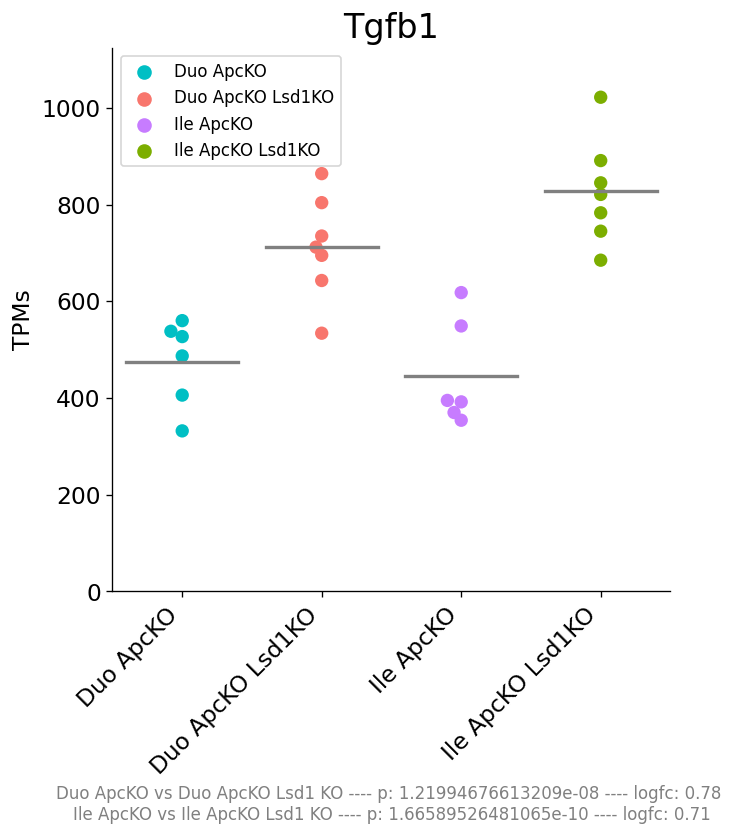

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

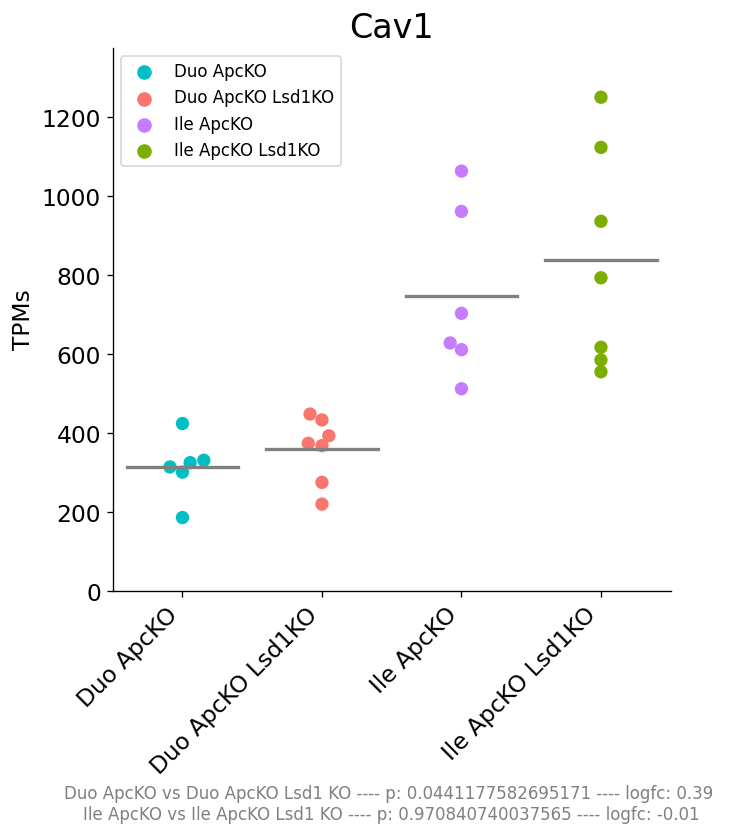

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

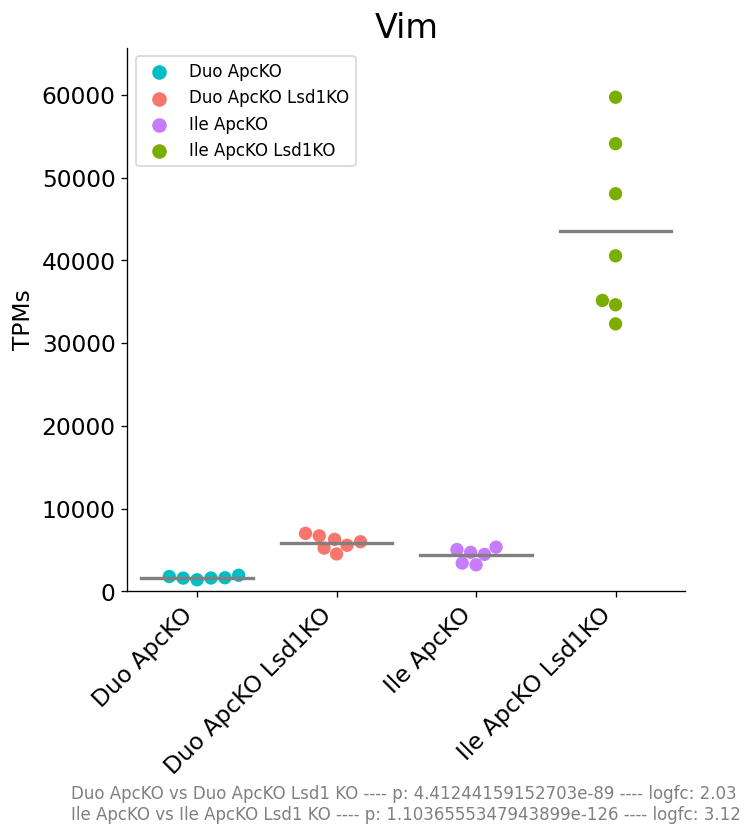

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

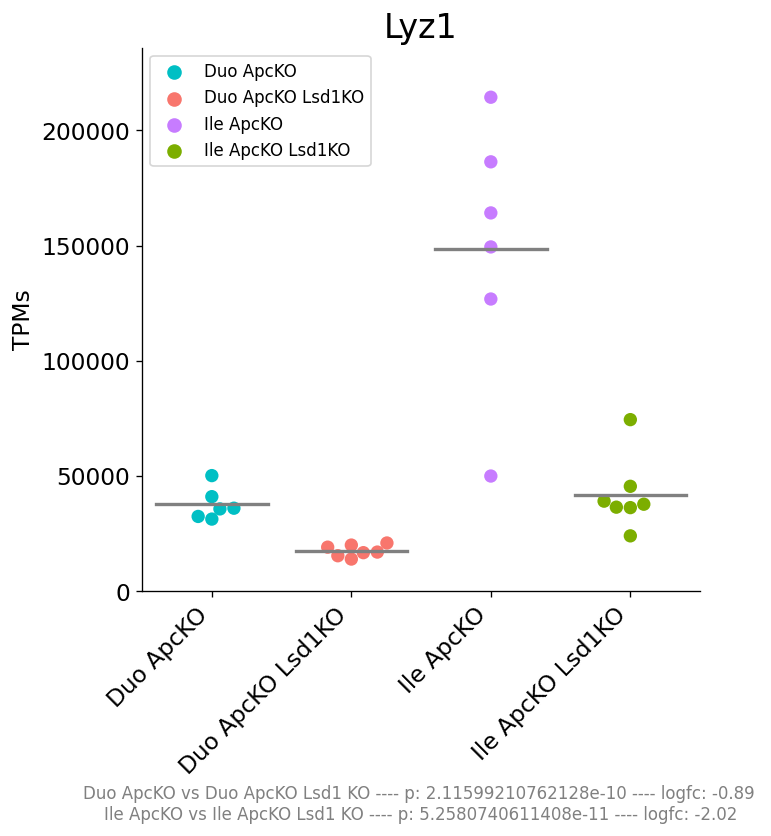

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

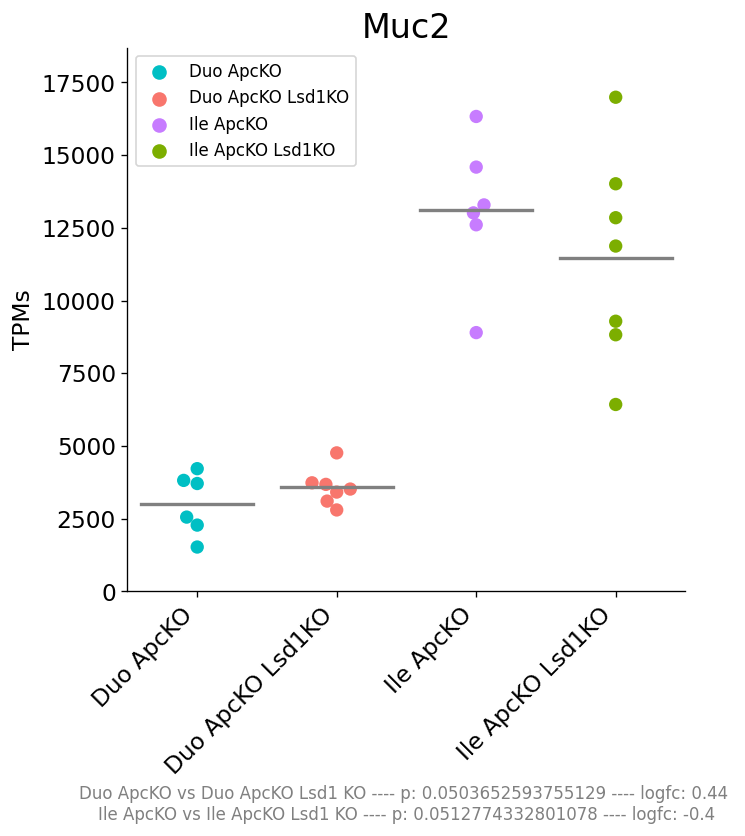

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

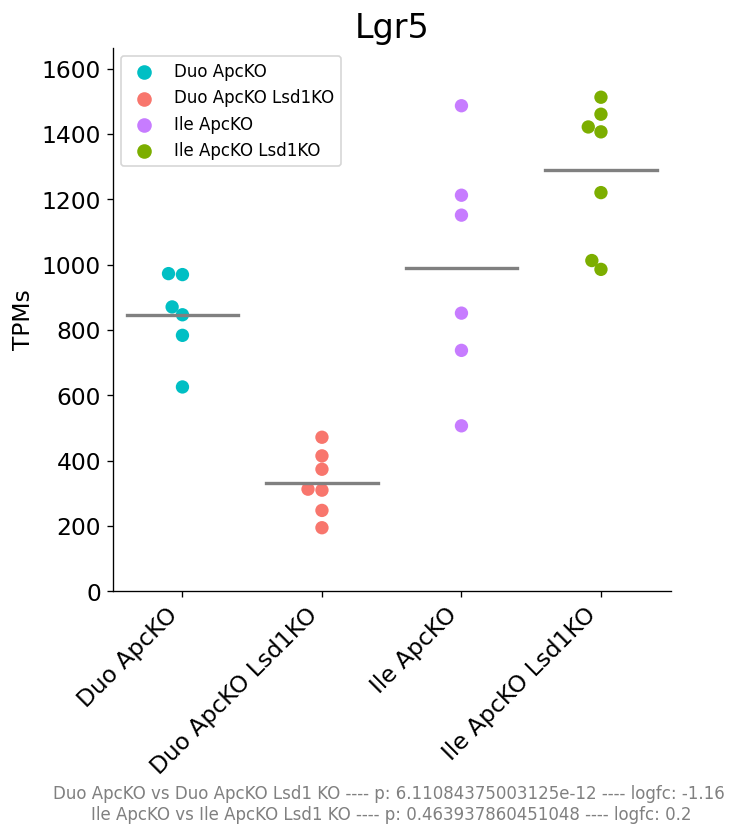

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

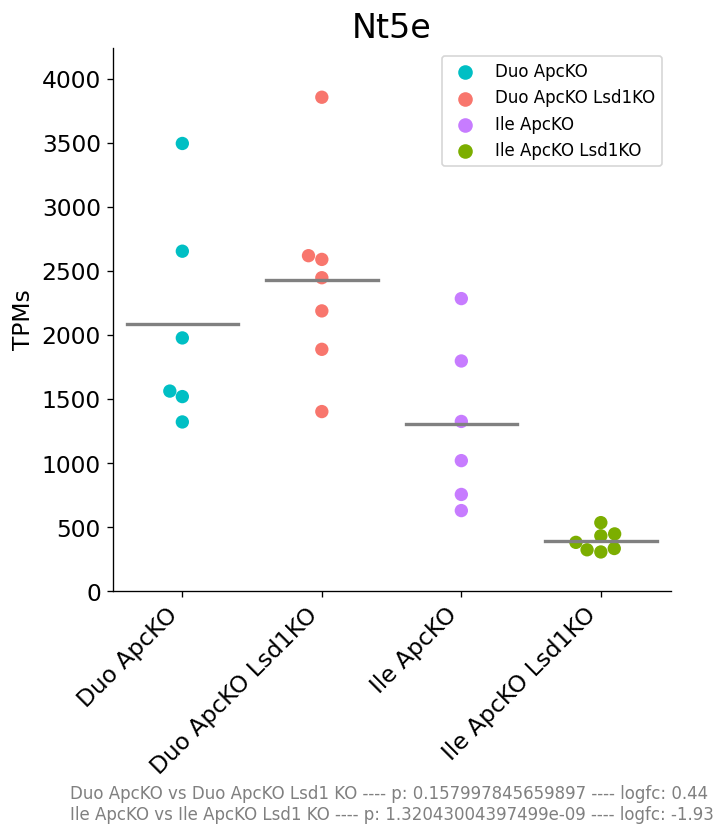

In [ ]:
for gene in gene_list_2:

  # Extracting full row from each gene and assigning it to a variable
  gene_row_duo = df_duo[df_duo.gene_name == gene]
  gene_row_ile = df_ile[df_ile.gene_name == gene]

  # Extract individual TPMs from row and add them to a list
  try:
    duo_single_ko_TPMs = []
    for n in range (1,7):
      duo_single_ko_TPMs.append(int(gene_row_duo[f"ApcK_D{n}_count"]))
  except TypeError:
    print(f"{gene} was not found on the .csv file, make sure you're using the right gene notation")

  try:
    duo_double_ko_TPMs = []
    for n in range (1,8):
      duo_double_ko_TPMs.append(int(gene_row_duo[f"ApcKLsd1K_D{n}_count"]))
  except TypeError:
    pass

  try:  
    ile_single_ko_TPMs = []
    for n in range (1,7):
      ile_single_ko_TPMs.append(int(gene_row_ile[f"ApcK_I{n}_count"]))
  except TypeError:
    pass

  try:
    ile_double_ko_TPMs = []
    for n in range (1,8):
      ile_double_ko_TPMs.append(int(gene_row_ile[f"ApcKLsd1K_I{n}_count"]))
  except TypeError:
    pass


  # Append an extra NaN value to the shorter lists (to avoid pandas error)
  duo_single_ko_TPMs.append(np.nan)
  ile_single_ko_TPMs.append(np.nan)

  # Get adjusted p-values of Duo and Ile comparisons and store them into a variable
  try:
    p_val_d = float(gene_row_duo["padj"])
    logfc_d = round(float(gene_row_duo["log2FoldChange"]), 2)
    p_val_i = float(gene_row_ile["padj"])
    logfc_i = round(float(gene_row_ile["log2FoldChange"]), 2)
  except TypeError:
    pass

  # Create a f-string containing all stat info that will be displayed as the x axis label
  try:
    stats = f"Duo ApcKO vs Duo ApcKO Lsd1 KO ---- p: {p_val_d} ---- logfc: {logfc_d} \nIle ApcKO vs Ile ApcKO Lsd1 KO ---- p: {p_val_i} ---- logfc: {logfc_i}"
  except NameError:
    pass

  # Define and create the DataFrames to plot 
  dataset = {
      "Duo ApcKO":duo_single_ko_TPMs,
      "Duo ApcKO Lsd1KO":duo_double_ko_TPMs,
      "Ile ApcKO":ile_single_ko_TPMs,
      "Ile ApcKO Lsd1KO":ile_double_ko_TPMs
  }
  try:
    df = pd.DataFrame(dataset)

    # Plot dataset with Seaborn
    plt.figure(figsize=(6,6), dpi=120)
    sns.swarmplot(data=df.melt(), x="variable", y="value", palette=['#00BFC4','#F8766D','#C77CFF','#7CAE00'], size = 8, hue = "variable")
    plt.legend().set_title(None)
    plt.title(label=gene, fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')

    # Plot the mean line
    sns.boxplot(showmeans=True,
                meanline=True,
                meanprops={'color': 'grey', 'ls': '-', 'lw': 2},
                medianprops={'visible': False},
                whiskerprops={'visible': False},
                zorder=10,
                x="variable",
                y="value",
                data=df.melt(),
                showfliers=False,
                showbox=False,
                showcaps=False)

    # Reset the axis title after using boxplot to plot the mean line
    plt.ylabel('TPMs', fontsize=14)
    plt.xlabel(stats, color="grey", fontsize=10, loc="center")


    # Fill the NaN values in the DataFrame to find the max value using to_numpy().max()
    df.fillna(0, inplace=True)

    # Change the y axis limits in order to leave space to plot the p-value on top
    ax1 = plt.gca()
    y_top_limit = (df.to_numpy().max()) + (df.to_numpy().max())*0.1
    ax1.set_ylim([0, y_top_limit])

    # Hide top and right spines from the frame
    ax1.spines["right"].set_visible(False)
    ax1.spines["top"].set_visible(False)

    # Save the result as a vector image to the default content folder
    plt.savefig(f"{gene}_TPMs.svg", format = 'svg', dpi=300, bbox_inches='tight')
    plt.savefig(f"{gene}_TPMs.jpg", format = 'jpeg', dpi=300, bbox_inches='tight')

    # Next line automatically downloads a copy of the .svg plot
    files.download(f"{gene}_TPMs.svg")
    files.download(f"{gene}_TPMs.jpg")

    # Display the result
    plt.show()
  except ValueError:
    print(f"{gene} was not found on the .csv file and could not be plotted")



